<a href="https://colab.research.google.com/github/Gaurav-Ramachandra/Sem6-ML_Lab/blob/main/ML%20Lab6%205-5-25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Accuracy: 0.868

📊 Classification Report:

               precision    recall  f1-score   support

   Çerçevelik       0.86      0.89      0.88       260
Ürgüp Sivrisi       0.88      0.85      0.86       240

     accuracy                           0.87       500
    macro avg       0.87      0.87      0.87       500
 weighted avg       0.87      0.87      0.87       500



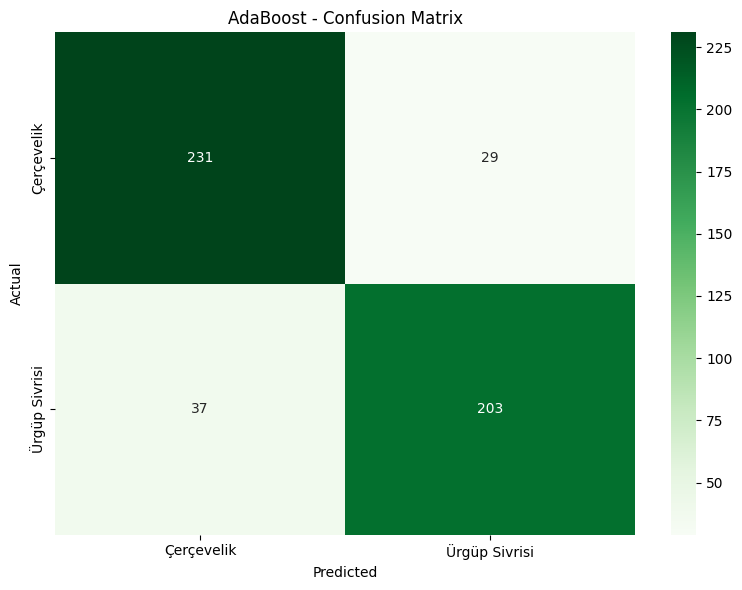

<ipython-input-2-b9f69989b5d1>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="summer")


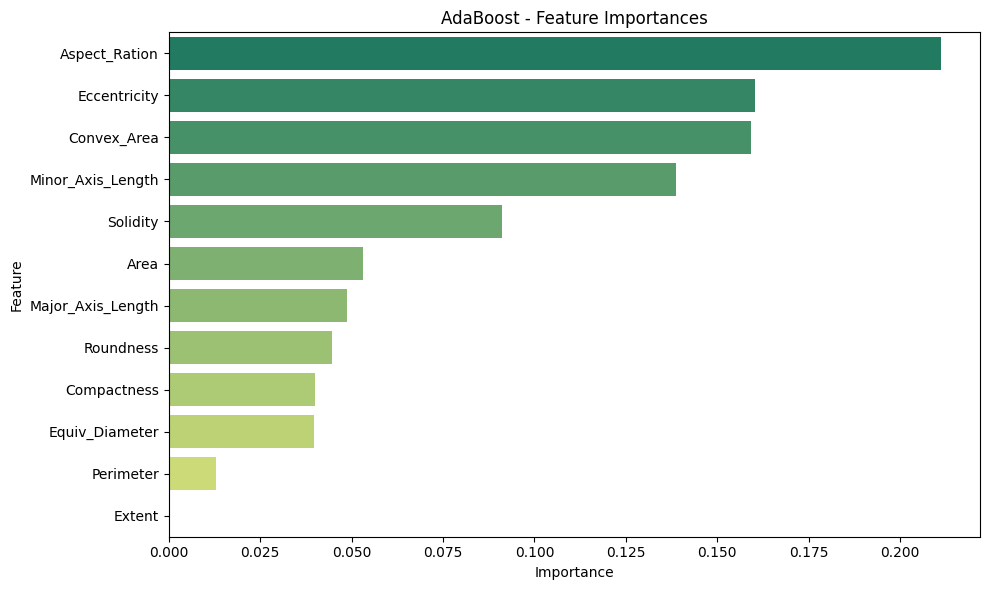

In [ ]:
# ADAboost boosting ensemble

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/drive/MyDrive/Sem-6/ML/Lab6/Pumpkin_Seeds_Dataset.xlsx"
df = pd.read_excel(file_path, sheet_name='Pumpkin_Seeds_Dataset')

# Features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Initialize AdaBoost with DecisionTree as base estimator
base_tree = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(
    estimator=base_tree,
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

# Train the model
adaboost_model.fit(X_train, y_train)

# Predict on test data
y_pred = adaboost_model.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("AdaBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Feature Importance Plot
importances = adaboost_model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices], palette="summer")
plt.title("AdaBoost - Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



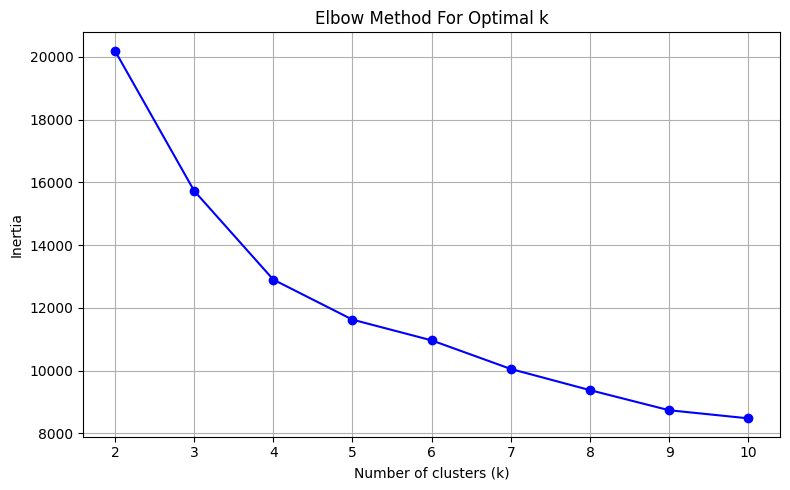

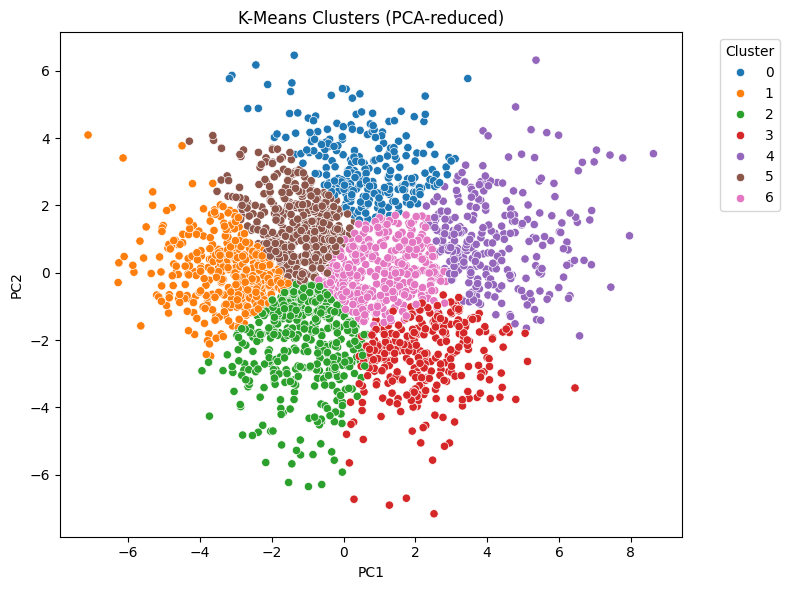


📊 Cluster vs Actual Class Comparison:

True_Class  Çerçevelik  Ürgüp Sivrisi
Cluster                              
0                  193             58
1                  391             27
2                  193            258
3                    7            292
4                   10            257
5                  365             37
6                  141            271

✅ Silhouette Score: 0.207


In [ ]:
# K-means Clustering

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load dataset
file_path = "/content/drive/MyDrive/Sem-6/ML/Lab6/Pumpkin_Seeds_Dataset.xlsx"
df = pd.read_excel(file_path, sheet_name='Pumpkin_Seeds_Dataset')

# Drop label column for unsupervised clustering
X = df.drop(columns=['Class'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Determine optimal number of clusters (Elbow Method)
inertia = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()

# Fit final K-Means model (e.g., k=7 for 7 seed types)
k = 7
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['Cluster'] = clusters

# Plot PCA visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='tab10')
plt.title("K-Means Clusters (PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Optional: Compare clusters with actual classes
df['True_Class'] = df['Class']
ct = pd.crosstab(df['Cluster'], df['True_Class'])
print("\n📊 Cluster vs Actual Class Comparison:\n")
print(ct)

# Silhouette Score
score = silhouette_score(X_scaled, clusters)
print(f"\n✅ Silhouette Score: {score:.3f}")
